In [1]:
# Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import copy as cp
import importlib

import self_defined_functions as ft

In [2]:
transCnt_dict = ft.get_trCnt()

In [3]:
ANOVA_df = ft.get_ANOVA_df()

In [4]:
obser = []
startDate = dt.datetime( 2015, 3, 1 )
for i in range( 60 ) : 
    obser.append( startDate ) 
    startDate += dt.timedelta( days = 1 )

In [5]:
cnt = []
for i in obser : 
    cnt.append( transCnt_dict[i] )

In [6]:
obser[0].weekday()

6

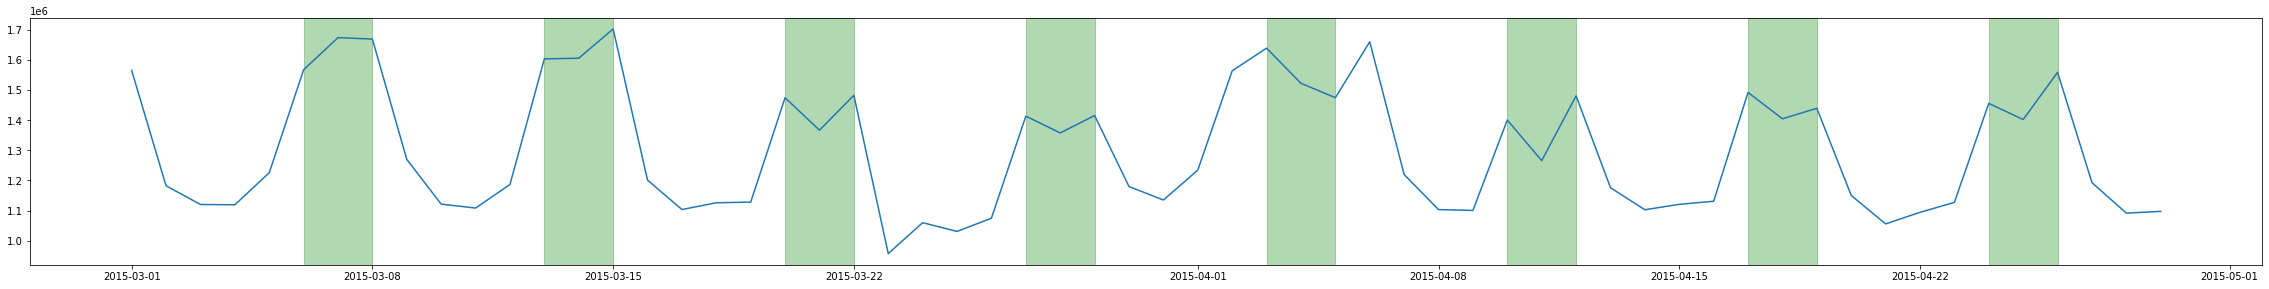

In [7]:
fig = plt.figure( figsize = ( 40, 10 ) ) 
ax = fig.add_subplot( 2, 1, 1 ) 
ax.plot( obser, cnt )
# ax.ylim( 0, 850000 )

start = None 
end = None 
for i in obser : 
    if i.weekday() == 4 :
        start = i
    elif i.weekday() == 6 and start != None : 
        end = i  
    if start != None and end != None : 
        ax.axvspan( start, end, color="green", alpha=0.3)
        start = None 
        end = None 

In [51]:
obserYear = 2012
avg = []
currentTime = dt.datetime( obserYear, 1, 1 )
currentMonth = currentTime.month
while currentTime.year < obserYear + 1 : 
    total = 0 
    leng = 0 
    while currentTime.month < currentMonth + 1 : 
        total += transCnt_dict[currentTime]
        leng += 1 
        currentTime += dt.timedelta( days = 1 )
    currentMonth += 1 
    avg.append( total / leng )
avg.append( total / leng ) 
    

2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012


KeyError: datetime.datetime(2022, 5, 2, 0, 0)

# 2Way ANOVA of different holiday

In [8]:
ANOVA_df_before2020 = ANOVA_df[ANOVA_df['year'] < 2020 ]
ANOVA_df_before2020_noTy = ANOVA_df_before2020[ANOVA_df_before2020['is_typhoon'] == False]
ANOVA_df_before2020_noTy_noNYE = ANOVA_df_before2020_noTy[ANOVA_df_before2020_noTy['is_CNYE'] == False]
ANOVA_df_before2020_noTy_noNYE = ANOVA_df_before2020_noTy_noNYE[ANOVA_df_before2020_noTy_noNYE['is_NYE'] == False]

In [9]:
ANOVA_df_before2020_noTy

,date,year,month,weekday,day,trans_cnt,is_typhoon,day_type,holi_type,holi_len,is_CNYE,is_NYE
0,2005-01-01,2005,1,5,1,765804,False,National,元旦,2,False,False
1,2005-01-02,2005,1,6,2,825816,False,National,元旦,2,False,False
2,2005-01-03,2005,1,0,3,596282,False,weekday,weekday,0,False,False
3,2005-01-04,2005,1,1,4,504102,False,weekday,weekday,0,False,False
4,2005-01-05,2005,1,2,5,526798,False,weekday,weekday,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5473,2019-12-27,2019,12,4,27,1556442,False,weekend,weekend,3,False,False
5474,2019-12-28,2019,12,5,28,1437054,False,weekend,weekend,3,False,False
5475,2019-12-29,2019,12,6,29,1264070,False,weekend,weekend,3,False,False
5476,2019-12-30,2019,12,0,30,1250386,False,weekday,weekday,0,False,False


In [10]:
results1 = smf.ols('trans_cnt ~ C(day_type) + C(weekday) + C(day_type):C(weekday)', data=ANOVA_df_before2020_noTy_noNYE).fit()
aov_14106_two = sms.anova_lm( results1, typ=2 )

aov_14106_two

c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '
c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(day_type),1.188831e+13,3.0,109.831318,1.927013e-47
C(weekday),1.647821e+12,6.0,7.611779,4.126793e-06
C(day_type):C(weekday),4.122769e+11,18.0,0.634810,4.256329e-01
Residual,1.868248e+14,5178.0,NaN,NaN


In [11]:
# results1 = smf.ols('trans_cnt~ C(day_type)', data=ANOVA_df_before2020_noTy_noNYE).fit()
# aov_table

In [27]:
stat1, p1 = stats.shapiro( results1.resid )
print( f'p = {p1}' )

p = 8.979128364620503e-29


c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
len( results1.resid )

5199

In [14]:
resid_dict1 = ft.build_dict( ANOVA_df_before2020_noTy_noNYE['date'], results1.resid )

In [15]:
importlib.reload( ft )

<module 'self_defined_functions' from 'c:\\PuSung\\University\\Sophomore\\110-2 Academic\\Satistics\\Statistics_FinalProject\\project_TRA\\self_defined_functions.py'>

In [16]:
stat, p = stats.chisquare( results1.resid )

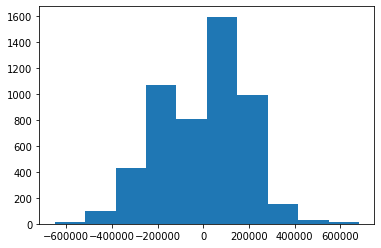

In [25]:
_ = plt.hist( results1.resid )

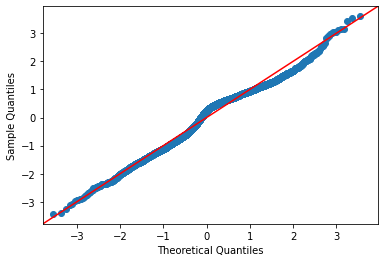

In [26]:
fig = sm.qqplot( results1.resid, stats.norm, fit=True, line = '45' ) 

In [17]:
stats.normaltest(results1.resid)

NormaltestResult(statistic=114.19938258371133, pvalue=1.5919123557652913e-25)

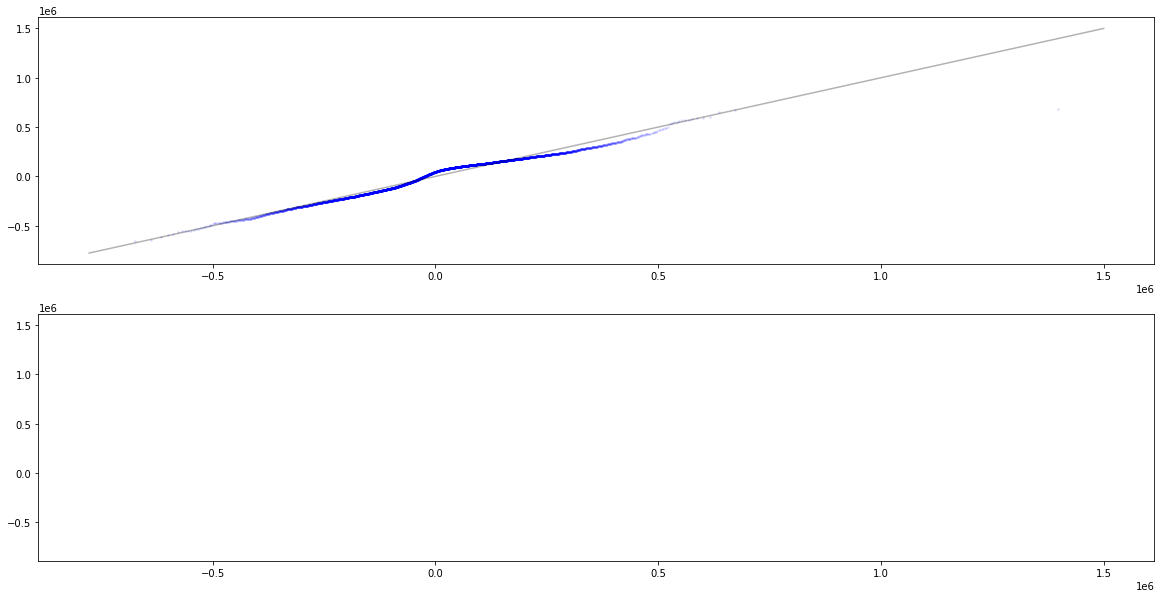

In [18]:
dif, dates, cnts, theos = ft.self_qqplot( resid_dict1, 2020 )

In [19]:
sorted( dates[:50] )

[Timestamp('2008-04-03 00:00:00'),
 Timestamp('2011-02-21 00:00:00'),
 Timestamp('2013-03-09 00:00:00'),
 Timestamp('2013-03-10 00:00:00'),
 Timestamp('2013-05-10 00:00:00'),
 Timestamp('2013-08-11 00:00:00'),
 Timestamp('2013-11-10 00:00:00'),
 Timestamp('2013-12-08 00:00:00'),
 Timestamp('2014-01-29 00:00:00'),
 Timestamp('2014-02-06 00:00:00'),
 Timestamp('2014-10-12 00:00:00'),
 Timestamp('2014-10-26 00:00:00'),
 Timestamp('2014-11-16 00:00:00'),
 Timestamp('2014-11-23 00:00:00'),
 Timestamp('2014-11-28 00:00:00'),
 Timestamp('2015-03-13 00:00:00'),
 Timestamp('2015-11-14 00:00:00'),
 Timestamp('2015-11-22 00:00:00'),
 Timestamp('2015-12-05 00:00:00'),
 Timestamp('2016-02-11 00:00:00'),
 Timestamp('2016-04-01 00:00:00'),
 Timestamp('2016-06-12 00:00:00'),
 Timestamp('2016-10-16 00:00:00'),
 Timestamp('2016-11-12 00:00:00'),
 Timestamp('2016-12-17 00:00:00'),
 Timestamp('2016-12-30 00:00:00'),
 Timestamp('2017-01-26 00:00:00'),
 Timestamp('2017-01-30 00:00:00'),
 Timestamp('2017-03-

In [20]:
cnts[:10], theos[:10]

(array([682253.09817571, 315589.26072273, 337935.26072273, 315553.81428087,
        315194.        , 318781.26072273, 318229.26072273, 336061.81428087,
        339577.19298514, 337861.86742146]),
 array([1396631.82814502,  380543.15854487,  402270.53768444,
         379854.09383853,  379170.02226614,  382641.14876367,
         381936.60013483,  399678.500107  ,  403151.54703588,
         401398.14920898]))

In [21]:
dates[:10]

array([Timestamp('2019-09-12 00:00:00'), Timestamp('2013-11-10 00:00:00'),
       Timestamp('2018-03-11 00:00:00'), Timestamp('2017-03-31 00:00:00'),
       Timestamp('2015-11-14 00:00:00'), Timestamp('2014-11-23 00:00:00'),
       Timestamp('2019-04-14 00:00:00'), Timestamp('2016-04-01 00:00:00'),
       Timestamp('2016-02-11 00:00:00'), Timestamp('2017-01-30 00:00:00')],
      dtype=object)

NameError: name 'results2' is not defined

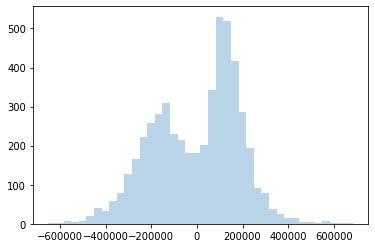

In [22]:
_ = plt.hist( results1.resid, bins='auto', alpha = 0.3 )
_ = plt.hist( results2.resid, bins='auto', alpha = 0.3 )

In [ ]:
import seaborn as sns

In [ ]:
AFTER_2020 = np.array( YEAR ) > 2020

In [ ]:
sns_df = pd.DataFrame( {'After_2020' : AFTER_2020, 'cnt' : CNT, 'resid':results.resid } )

Text(0, 0.5, 'Value')

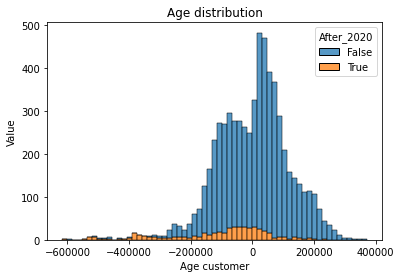

In [ ]:
sns.histplot(data=sns_df, x="resid", hue="After_2020", multiple="stack")
plt.title("Age distribution")
plt.xlabel("Age customer")
plt.ylabel("Value")

# 2 way ANOVA of different length of weekends